In [1]:
# We reached out to the researchers of the group for code for Extended Isolation Forest with Fuzzy C-Means, as it
# was our original project. No code was able to be provided by the researchers, so we changed the direction of our
# project. Now we are working on the original IF and EIF because EIF was an expansion of IF. We are justifying why
# one is better over the one (for our specific anomaly data set).
# We found papers that talked about why EIF is better for specific data types (and vice versa for IF). We wanted to
# contribute in our own way with comparing the two algorithms with using a credit card fraud data set.
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Anomalies were detected on a spectrum between 0 and 1 (with 1 being an anomaly)
# Isolation Forest was implemented on a credit card transaction data set to compare with Extended Isolation Forest

In [2]:
import h2o
from h2o.estimators import H2OExtendedIsolationForestEstimator
h2o.init()

# Import the prostate dataset
df = h2o.import_file("creditcard.csv")

# Set the predictors
predictors = ["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", 
              "V20", "V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28"]

# Define an Extended Isolation forest model
eif = H2OExtendedIsolationForestEstimator(model_id = "eif.hex",
                                          ntrees = 100,
                                          sample_size = 256,
                                          extension_level = len(predictors) - 1)

# Train Extended Isolation Forest
eif.train(x = predictors,
          training_frame = df)

# Calculate score
eif_result = eif.predict(df)

# Number in [0, 1] explicitly defined in Equation (1) from Extended Isolation Forest paper
# or in paragraph '2 Isolation and Isolation Trees' of Isolation Forest paper
anomaly_score = eif_result["anomaly_score"]

# Average path length  of the point in Isolation Trees from root to the leaf
mean_length = eif_result["mean_length"]

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_302"; OpenJDK Runtime Environment (Temurin)(build 1.8.0_302-b08); OpenJDK 64-Bit Server VM (Temurin)(build 25.302-b08, mixed mode)
  Starting server from /Users/scotthardy/opt/anaconda3/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/7d/_1x_hxyn3x5dbfrvz3bs7w100000gn/T/tmpwqbyj9f0
  JVM stdout: /var/folders/7d/_1x_hxyn3x5dbfrvz3bs7w100000gn/T/tmpwqbyj9f0/h2o_scotthardy_started_from_python.out
  JVM stderr: /var/folders/7d/_1x_hxyn3x5dbfrvz3bs7w100000gn/T/tmpwqbyj9f0/h2o_scotthardy_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,25 days
H2O_cluster_name:,H2O_from_python_scotthardy_4d5424
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.770 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
extendedisolationforest Model Build progress: |██████████████████████████████████| (done) 100%
extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%


In [3]:
# Describe some basic information about the data set

In [4]:
# mean lengh = (path_length(x) + c.(Node.num_rows)) / number of trees
mean_length

mean_length
16.1303
16.6059
14.959
15.6409
15.9959
16.7051
16.4024
13.9352
15.347
16.474


In [5]:
# listing out the columns in the data set
df.columns

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [6]:
# first ten rows printed out
df.head()

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.35981,-0.0727812,2.53635,1.37816,-0.338321,0.462388,0.239599,0.0986979,0.363787,0.0907942,-0.5516,-0.617801,-0.99139,-0.311169,1.46818,-0.470401,0.207971,0.0257906,0.403993,0.251412,-0.0183068,0.277838,-0.110474,0.0669281,0.128539,-0.189115,0.133558,-0.0210531,149.62,0
0,1.19186,0.266151,0.16648,0.448154,0.0600176,-0.0823608,-0.078803,0.0851017,-0.255425,-0.166974,1.61273,1.06524,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.0690831,-0.225775,-0.638672,0.101288,-0.339846,0.16717,0.125895,-0.0089831,0.0147242,2.69,0
1,-1.35835,-1.34016,1.77321,0.37978,-0.503198,1.8005,0.791461,0.247676,-1.51465,0.207643,0.624501,0.0660837,0.717293,-0.165946,2.34586,-2.89008,1.10997,-0.121359,-2.26186,0.52498,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.0553528,-0.0597518,378.66,0
1,-0.966272,-0.185226,1.79299,-0.863291,-0.0103089,1.2472,0.237609,0.377436,-1.38702,-0.0549519,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.05965,-0.684093,1.96578,-1.23262,-0.208038,-0.1083,0.0052736,-0.190321,-1.17558,0.647376,-0.221929,0.0627228,0.0614576,123.5,0
2,-1.15823,0.877737,1.54872,0.403034,-0.407193,0.0959215,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.34585,-1.11967,0.175121,-0.451449,-0.237033,-0.0381948,0.803487,0.408542,-0.0094307,0.798278,-0.137458,0.141267,-0.20601,0.502292,0.219422,0.215153,69.99,0
2,-0.425966,0.960523,1.14111,-0.168252,0.420987,-0.0297276,0.476201,0.260314,-0.568671,-0.371407,1.34126,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.0581328,0.0686531,-0.0331938,0.0849677,-0.208254,-0.559825,-0.0263977,-0.371427,-0.232794,0.105915,0.253844,0.0810803,3.67,0
4,1.22966,0.141004,0.0453708,1.20261,0.191881,0.272708,-0.005159,0.0812129,0.46496,-0.0992543,-1.41691,-0.153826,-0.751063,0.167372,0.0501436,-0.443587,0.00282051,-0.611987,-0.045575,-0.219633,-0.167716,-0.27071,-0.154104,-0.780055,0.750137,-0.257237,0.0345074,0.00516777,4.99,0
7,-0.644269,1.41796,1.07438,-0.492199,0.948934,0.428118,1.12063,-3.80786,0.615375,1.24938,-0.619468,0.291474,1.75796,-1.32387,0.686133,-0.076127,-1.22213,-0.358222,0.324505,-0.156742,1.94347,-1.01545,0.0575035,-0.649709,-0.415267,-0.0516343,-1.20692,-1.08534,40.8,0
7,-0.894286,0.286157,-0.113192,-0.271526,2.6696,3.72182,0.370145,0.851084,-0.392048,-0.41043,-0.705117,-0.110452,-0.286254,0.0743554,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.0527357,-0.0734251,-0.268092,-0.204233,1.01159,0.373205,-0.384157,0.0117474,0.142404,93.2,0
9,-0.338262,1.11959,1.04437,-0.222187,0.499361,-0.246761,0.651583,0.0695386,-0.736727,-0.366846,1.01761,0.83639,1.00684,-0.443523,0.150219,0.739453,-0.54098,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.38505,-0.069733,0.0941988,0.246219,0.0830756,3.68,0


In [7]:
# describe the dataset
df.describe()

Rows:284807
Cols:31

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
type,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int
mins,0.0,-56.407509631329,-72.7157275629303,-48.3255893623954,-5.68317119816995,-113.743306711146,-26.1605059358433,-43.5572415712451,-73.2167184552674,-13.4340663182301,-24.5882624372475,-4.79747346479757,-18.6837146333443,-5.79188120632084,-19.2143254902614,-4.49894467676621,-14.1298545174931,-25.1627993693248,-9.49874592104677,-7.21352743017759,-54.497720494566,-34.8303821448146,-10.933143697655,-44.8077352037913,-2.83662691870341,-10.2953970749851,-2.60455055280817,-22.5656793207827,-15.4300839055349,0.0,0.0
mean,94813.85957508099,1.328442755752275e-15,4.087516171545461e-16,-1.5839125164738662e-15,2.209813430241765e-15,1.0729729950306835e-15,1.3156692677161953e-15,-4.981660334071031e-16,2.2992278464943217e-16,-2.203426686223725e-15,2.1108188979621483e-15,2.082078549880969e-15,-1.558365540401707e-15,7.05735213993396e-16,1.6350064686181845e-15,4.866698941746315e-15,1.3747466498830633e-15,-2.2992278464943217e-16,1.1304536911930417e-15,9.99525438823226e-16,6.195141697498589e-16,1.9479569255021338e-16,-2.554697607215913e-16,3.0975708487492947e-16,4.489881044681968e-15,6.76994865912217e-16,1.705260652816622e-15,-3.641442019035495e-16,-1.2314440809782957e-16,88.34961925093138,0.001727485630620034
maxs,172792.0,2.45492999121121,22.0577289904909,9.38255843282114,16.8753440335975,34.8016658766686,73.3016255459646,120.589493945238,20.0072083651213,15.5949946071278,23.7451361206545,12.0189131816199,7.8483920756446,7.12688295859376,10.5267660517847,8.87774159774277,17.3151115176278,9.25352625047285,5.04106918541184,5.59197142733558,39.4209042482199,27.2028391573154,10.5030900899454,22.5284116897749,4.58454913689817,7.51958867870916,3.5173456116238,31.6121981061363,33.8478078188831,25691.16,1.0
sigma,47488.14595456652,1.9586958038574862,1.6513085794769973,1.5162550051777715,1.4158685749409203,1.3802467340314382,1.3322710897575754,1.237093598182667,1.194352902669203,1.0986320892243189,1.0888497654025167,1.0207130277115588,0.9992013895301447,0.9952742301251528,0.9585956112570638,0.9153160116104389,0.87625288738837,0.8493370636743898,0.838176209528841,0.8140405007685778,0.7709250248871169,0.7345240143713138,0.7257015604409117,0.6244602955949904,0.6056470678271598,0.5212780705409428,0.48222701326105744,0.4036324949650303,0.3300832641602511,250.12010924018873,0.041527189635465055
zeros,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1825,284315
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62,0.0
1,0.0,1.19185711131486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,-0.166974414004614,1.61272666105479,1.06523531137287,0.48909501589608,-0.143772296441519,0.635558093258208,0.463917041022171,-0.114804663102346,-0.183361270123994,-0.145783041325259,-0.0690831352230203,-0.225775248033138,-0.638671952771851,0.101288021253234,-0.339846475529127,0.167170404418143,0.125894532368176,-0.00898309914322813,0.0147241691924927,2.69,0.0
2,1.0,-1.35835406159823,-1.34016307473609,1.77320934263119,0.379779593034328,-0.503198133318193,1.80049938079263,0.791460956450422,0.247675786588991,-1.51465432260583,0.207642865216696,0.6245014594248

In [8]:
# number of rows, columns
df.shape

(284807, 31)

In [9]:
#smallest value in the dataset
df.min()

-113.743306711146

In [10]:
#largest value in the dataset
df.max()

172792.0

In [11]:
# 0 is normal, 1 is an anomaly
# mean lengh = (path_length(x) + c.(Node.num_rows)) / number of trees
seed = 12345
ntrees = 100
isoforest = h2o.estimators.H2OIsolationForestEstimator(
    ntrees=ntrees, seed=seed)
isoforest.train(x=df.col_names[0:35], training_frame=df)
predictions = isoforest.predict(df)

predictions

isolationforest Model Build progress: |██████████████████████████████████████████| (done) 100%
isolationforest prediction progress: |███████████████████████████████████████████| (done) 100%


predict,mean_length
0.0244499,6.85
0.0171149,6.88
0.117359,6.47
0.0635697,6.69
0.0391198,6.79
0.0195599,6.87
0.0220049,6.86
0.173594,6.24
0.0513447,6.74
0.0171149,6.88


In [12]:
#predict showing a normalized anomaly score, 
#and mean_length showing the average number of splits across all trees to isolate the observation
predictions.cor()

predict,mean_length
1,-1
-1,1


In [13]:
quantile = 0.95
quantile_frame = predictions.quantile([quantile])
quantile_frame

Probs,predictQuantiles,mean_lengthQuantiles
0.95,0.171149,6.94


In [14]:
threshold = quantile_frame[0, "predictQuantiles"]
predictions["predicted_class"] = predictions["predict"] > threshold
predictions["class"] = df["Class"]
predictions

predict,mean_length,predicted_class,class
0.0244499,6.85,0,0
0.0171149,6.88,0,0
0.117359,6.47,0,0
0.0635697,6.69,0,0
0.0391198,6.79,0,0
0.0195599,6.87,0,0
0.0220049,6.86,0,0
0.173594,6.24,1,0
0.0513447,6.74,0,0
0.0171149,6.88,0,0


<IPython.core.display.Javascript object>


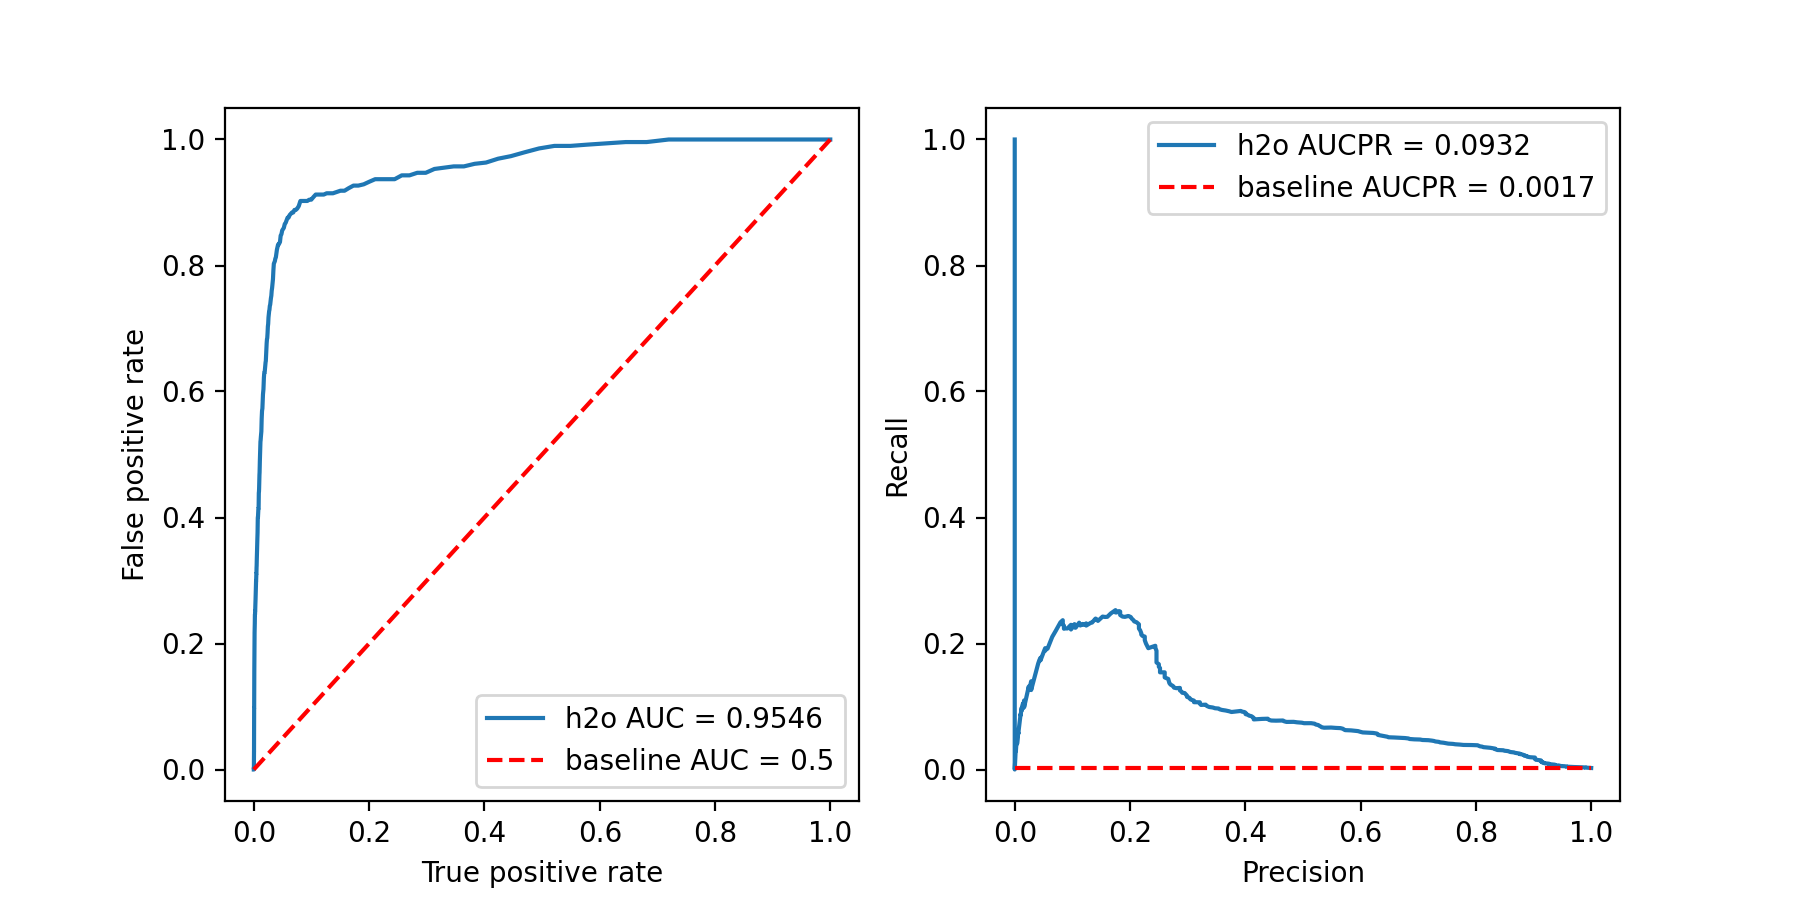

In [15]:
# comparing Extended Isolation Forest against the Area Under The Precision-Recall
%matplotlib notebook
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import numpy as np



def get_auc(labels, scores):
    fpr, tpr, thresholds = roc_curve(labels, scores)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score


def get_aucpr(labels, scores):
    precision, recall, th = precision_recall_curve(labels, scores)
    aucpr_score = np.trapz(recall, precision)
    return precision, recall, aucpr_score


def plot_metric(ax, x, y, x_label, y_label, plot_label, style="-"):
    ax.plot(x, y, style, label=plot_label)
    ax.legend()
    
    ax.set_ylabel(x_label)
    ax.set_xlabel(y_label)


def prediction_summary(labels, predicted_score, info, plot_baseline=True, axes=None):
    if axes is None:
        axes = [plt.subplot(1, 2, 1), plt.subplot(1, 2, 2)]

    fpr, tpr, auc_score = get_auc(labels, predicted_score)
    plot_metric(axes[0], fpr, tpr, "False positive rate",
                "True positive rate", "{} AUC = {:.4f}".format(info, auc_score))
    if plot_baseline:
        plot_metric(axes[0], [0, 1], [0, 1], "False positive rate",
                "True positive rate", "baseline AUC = 0.5", "r--")

    precision, recall, aucpr_score = get_aucpr(labels, predicted_score)
    plot_metric(axes[1], recall, precision, "Recall",
                "Precision", "{} AUCPR = {:.4f}".format(info, aucpr_score))
    if plot_baseline:
        thr = sum(labels)/len(labels)
        plot_metric(axes[1], [0, 1], [thr, thr], "Recall",
                "Precision", "baseline AUCPR = {:.4f}".format(thr), "r--")

    plt.show()
    return axes


def figure():
    fig_size = 4.5
    f = plt.figure()
    f.set_figheight(fig_size)
    f.set_figwidth(fig_size*2)


h2o_predictions = predictions.as_data_frame()

figure()
axes = prediction_summary(
    h2o_predictions["class"], h2o_predictions["predict"], "h2o")

In [16]:
# 0 is normal, 1 is an anomaly
anomaly_score

anomaly_score
0.335761
0.32513
0.363452
0.347066
0.338829
0.322955
0.329637
0.38952
0.354035
0.328043
